In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
import joblib

train = joblib.load("../assets/combined/train_impute.pkl")
test = joblib.load("../assets/combined/test_impute.pkl")
train.shape, test.shape

((2643279, 140), (694638, 140))

In [3]:
train.head()

,user_id,app_id,relevance_score,user_country_code,user_has_coordinates,user_latitude,user_longitude,user_account_age_months,game_name,game_tba,game_RAWG_weighted_avg_rating,game_RAWG_ratings_count,game_RAWG_reviews_with_text_count,game_RAWG_bookmark_count,game_metacritic_rating,game_RAWG_system_suggest_count,game_RAWG_reviews_count,game_genres,game_tags,game_esrb_rating,game_released_year,game_released_month,game_released_day,game_RAWG_rating_5_percent,game_RAWG_rating_4_percent,game_RAWG_rating_3_percent,game_RAWG_rating_1_percent,game_RAWG_bookmark_type_yet_count,game_RAWG_bookmark_type_owned_count,game_RAWG_bookmark_type_beaten_count,game_RAWG_bookmark_type_toplay_count,game_RAWG_bookmark_type_dropped_count,game_RAWG_bookmark_type_playing_count,game_available_platform,game_available_parent_platforms,game_developer,game_publisher,game_positive_review_count,game_negative_review_count,game_avg_user_score,game_avg_playtime_forever,game_avg_playtime_last_2weeks,game_median_playtime_forever,game_median_last_2weeks,game_current_price,game_initial_price,game_current_discount,game_concurrent_user,game_estimate_owners_lower,game_estimate_owners_upper,game_esrb_rating_Rating Pending,game_esrb_rating_Missing,game_esrb_rating_Mature,game_esrb_rating_Everyone 10+,game_esrb_rating_Teen,game_esrb_rating_Everyone,game_esrb_rating_Adults Only,game_esrb_rating_Unknown,game_genres_Action,game_genres_Adventure,game_genres_Arcade,game_genres_Board Games,game_genres_Card,game_genres_Casual,game_genres_Educational,game_genres_Family,game_genres_Fighting,game_genres_Indie,game_genres_Massively Multiplayer,game_genres_Platformer,game_genres_Puzzle,game_genres_RPG,game_genres_Racing,game_genres_Shooter,game_genres_Simulation,game_genres_Sports,game_genres_Strategy,game_genres_Unknown,game_platforms_3DO,game_platforms_Android,game_platforms_Apple Macintosh,game_platforms_Atari,game_platforms_Commodore / Amiga,game_platforms_Linux,game_platforms_Neo Geo,game_platforms_Nintendo,game_platforms_PC,game_platforms_PlayStation,game_platforms_SEGA,game_platforms_Web,game_platforms_Xbox,game_platforms_iOS,game_popularity,user_preference_game_popularity,user_preference_game_duration,user_preference_new_game,user_preference_avg_spent,user_preference_game_esrb_rating_Rating Pending,user_preference_game_esrb_rating_Missing,user_preference_game_esrb_rating_Mature,user_preference_game_esrb_rating_Everyone 10+,user_preference_game_esrb_rating_Teen,user_preference_game_esrb_rating_Everyone,user_preference_game_esrb_rating_Adults Only,user_preference_game_esrb_rating_Unknown,user_preference_game_genres_Action,user_preference_game_genres_Adventure,user_preference_game_genres_Arcade,user_preference_game_genres_Board Games,user_preference_game_genres_Card,user_preference_game_genres_Casual,user_preference_game_genres_Educational,user_preference_game_genres_Family,user_preference_game_genres_Fighting,user_preference_game_genres_Indie,user_preference_game_genres_Massively Multiplayer,user_preference_game_genres_Platformer,user_preference_game_genres_Puzzle,user_preference_game_genres_RPG,user_preference_game_genres_Racing,user_preference_game_genres_Shooter,user_preference_game_genres_Simulation,user_preference_game_genres_Sports,user_preference_game_genres_Strategy,user_preference_game_genres_Unknown,user_preference_game_platforms_3DO,user_preference_game_platforms_Android,user_preference_game_platforms_Apple Macintosh,user_preference_game_platforms_Atari,user_preference_game_platforms_Commodore / Amiga,user_preference_game_platforms_Linux,user_preference_game_platforms_Neo Geo,user_preference_game_platforms_Nintendo,user_preference_game_platforms_PC,user_preference_game_platforms_PlayStation,user_preference_game_platforms_SEGA,user_preference_game_platforms_Unknown,user_preference_game_platforms_Web,user_preference_game_platforms_Xbox,user_preference_game_platforms_iOS
0,76561198073669602,4000,0.641805,Missing,False,42.605186,9.493053,149.106555,Garry's Mod,False,3.79,158

In [4]:
# Take "game_tag" as text and perform 

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1.1 Distribution of Game Genres and Player Preference

## 1.1. Glance at game counts by genres

In [6]:
len(train["app_id"].unique()), len(test["app_id"].unique())

(24301, 24680)

In [7]:
def game_genre_counts(df):

    '''This function will calculate the genre counts. Note we have over millions of records but only 20k games in the dataset,
    we will drop duplicates here.

    Input:  Dataset of games
    Output:  DataFrame of counts by genres 
    '''

    genre_col = [col for col in df.columns if col.startswith("game_genres_")]

    # Drop duplicates:
    df = df.drop_duplicates(subset = "app_id")

    # Game count DataFrame
    game_counts_df  = df[genre_col].sum().sort_values(ascending = False).reset_index()
    game_counts_df.columns =["genres","game_counts"]
    game_counts_df["genres"] = game_counts_df["genres"].str.replace("game_genres_","")

    return game_counts_df   

In [8]:
def genres_by_count_visualization(train, test):
    
    ''' This function will take train and test dataset, on which execuating game_genre_counts 
    and return visualization barplot.
    '''
    
    train = game_genre_counts(train)
    test = game_genre_counts(test)

    fig, ax = plt.subplots(2,1, figsize = (8,8), sharex = True)

    sns.barplot(data = train, y= "genres", x = "game_counts", ax= ax[0], palette = "viridis")
    ax[0].set_title("Game counts by genre: Train dataset")

    sns.barplot(data = test, y= "genres", x = "game_counts", ax= ax[1], palette = "viridis")
    ax[1].set_title("Game counts by genre: Test dataset")

    plt.xticks(rotation = 45)

    plt.tight_layout()


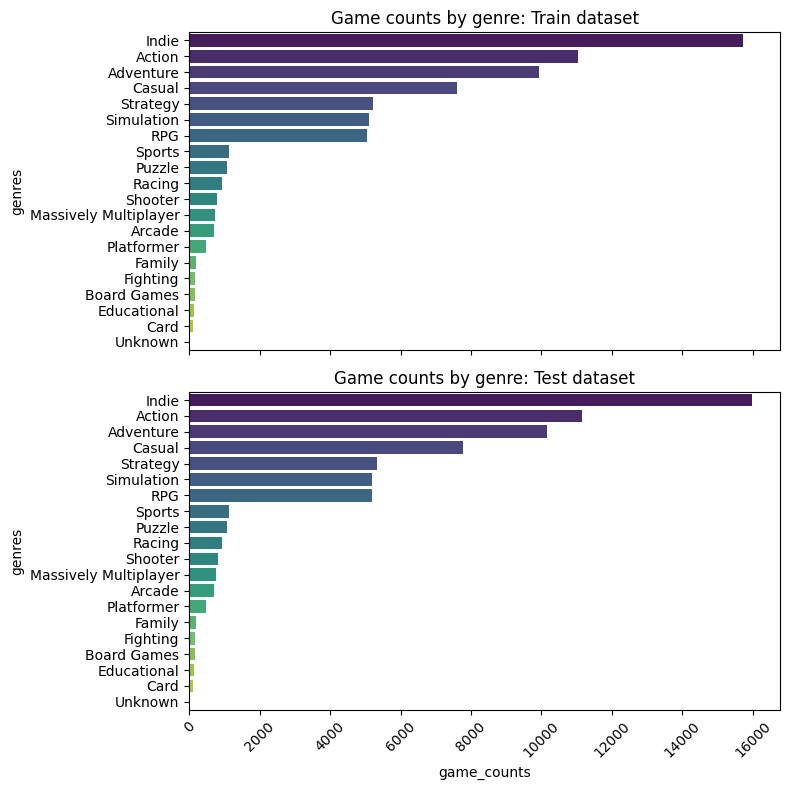

In [9]:
genres_by_count_visualization(train, test);

It is found the distributions between train and test dataset on genres are almost the same.
"Indie", "Action" and "Adventure" are the most popular genres with ~10k records or above.

## 1.2. Glance at game counts by user preferences

In [10]:
def game_genre_user_preference(df):

    '''This function will calculate the user_preference by genres. 
    Input:  Dataset of games
    Output:  DataFrame of user_preference genres
    '''

    preference_genre_col = [col for col in df.columns if col.startswith("user_preference_game_genres_")]

    # Game genre_pref DataFrame
    game_genre_pref_df  = df[preference_genre_col]

    # Rename columns
    col_names = []
    for col in game_genre_pref_df.columns:
        col_names.append(col.replace("user_preference_game_genres_", ""))
    
    game_genre_pref_df.columns =col_names
    return game_genre_pref_df 

In [11]:
def game_genre_user_preference_visualization(train, test):
    ''' This function will take train and test dataset, on which game_genre_user_preference
    and return visualization violinplot. No need to drop duplicates as we only consider user preference records
    '''
    
    train = game_genre_user_preference(train)
    test = game_genre_user_preference(test)


    fig, ax = plt.subplots(2,1, figsize = (8,8))

    sns.violinplot(data = train, ax= ax[0], palette = "Set2")
    ax[0].set_title("User preference rating by genre: Train dataset")
    ax[0].tick_params(axis='x', rotation=90)

    sns.violinplot(data = test, ax= ax[1], palette = "Set2")
    ax[1].set_title("User preference rating by genre: Test dataset")
    ax[1].tick_params(axis='x', rotation=90)

    plt.tight_layout()


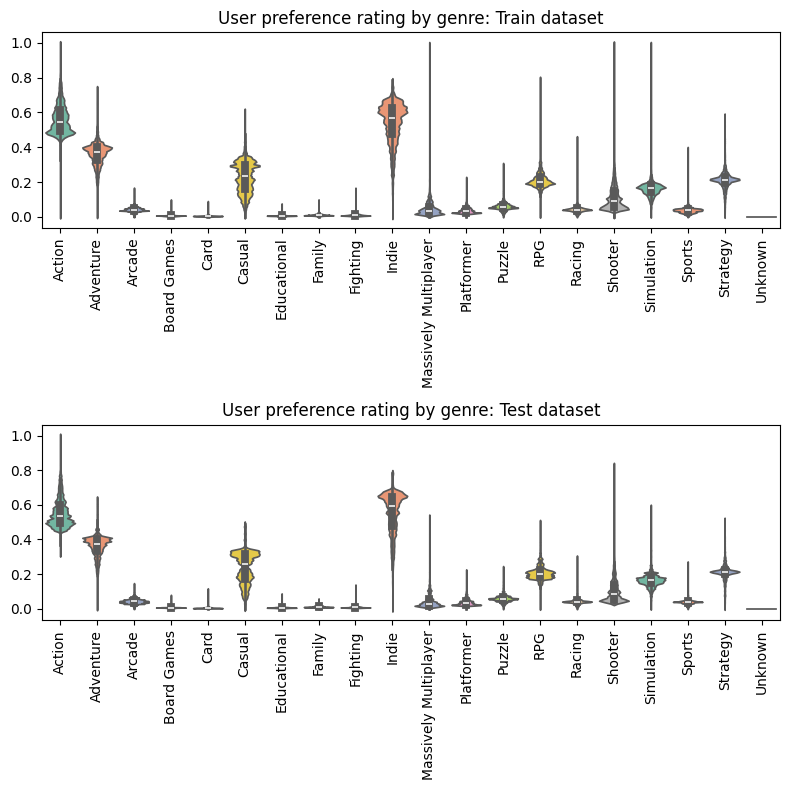

In [12]:
game_genre_user_preference_visualization(train, test);

Looks the differences across the genres are huge. The trend is similar to that of counts vs genres.

## 1.3. Put count and relevance score together

The above result makes sense as the user_preference_score are calculated by 
`df.groupby('user_id')[game_genres_onehot_cols].mean()`. 
This means the preferences are closely related to the distribution of the games: the higher game counts usually means the larger probability that the users have played it. 

Instead, we will examine whether relevance score makes more sense.

In [13]:
def count_relevance_score(df):
    '''This function will build up a DataFrame with the following columns: 
        game genres: the genres included in the data
        counts: the counts by each genre
        average_relevance_score: the average relevance score by each genre
    '''
    
    # Columns of genres (One-hot type)
    genre_col = [col for col in df.columns if col.startswith("game_genres_")]

    genre_ls = []
    rel_score_ls = []
    for col in genre_col:
        # Calculate the average relevance score by genre
        rel_score = df.loc[df[col] == 1,"relevance_score"].mean() 

        # Standarize genre names
        genre_txt = col.replace("game_genres_","")

        # Generate the list for DataFrame construction
        rel_score_ls.append(rel_score)
        genre_ls.append(genre_txt)
    # Generate a DataFrame with genres and average relevance score
    df_counts_relevance = pd.DataFrame({"genres": genre_ls, "average_relevance_score":rel_score_ls})

    # Merge with the genre counts DataFrame
    df_counts = game_genre_counts(df)
    df_counts_relevance_score = pd.merge(df_counts, df_counts_relevance, how = "inner", on = "genres")

    return df_counts_relevance_score   

In [14]:
def count_relevance_score_visualization(train, test):
    ''' This function will take train and test dataset, on which count_relevance_score will be run and return 
    visualization scatterplot. 
    '''

    train = count_relevance_score(train)
    test = count_relevance_score(test)

    fig, ax = plt.subplots(1,2, figsize = (16,6))

    sns.scatterplot(data = train, x = "game_counts", y = "average_relevance_score", hue = "genres",  ax= ax[0], 
                    s = 60, palette = "Set2", legend = False)
    ax[0].set_title("Average relevance score vs game counts by genre: Train dataset")
    ax[0].tick_params(axis='x', rotation=90)

    sns.scatterplot(data = test, x = "game_counts", y = "average_relevance_score", hue = "genres",  ax= ax[1], 
                    s = 60, palette = "Set2")
    ax[1].set_title("Average relevance score vs game counts by genre: Test dataset")
    ax[1].tick_params(axis='x', rotation=90)

    sns.move_legend(ax[1], "center right", bbox_to_anchor=(1.4, 0.5))
    plt.tight_layout()
    return  train, test

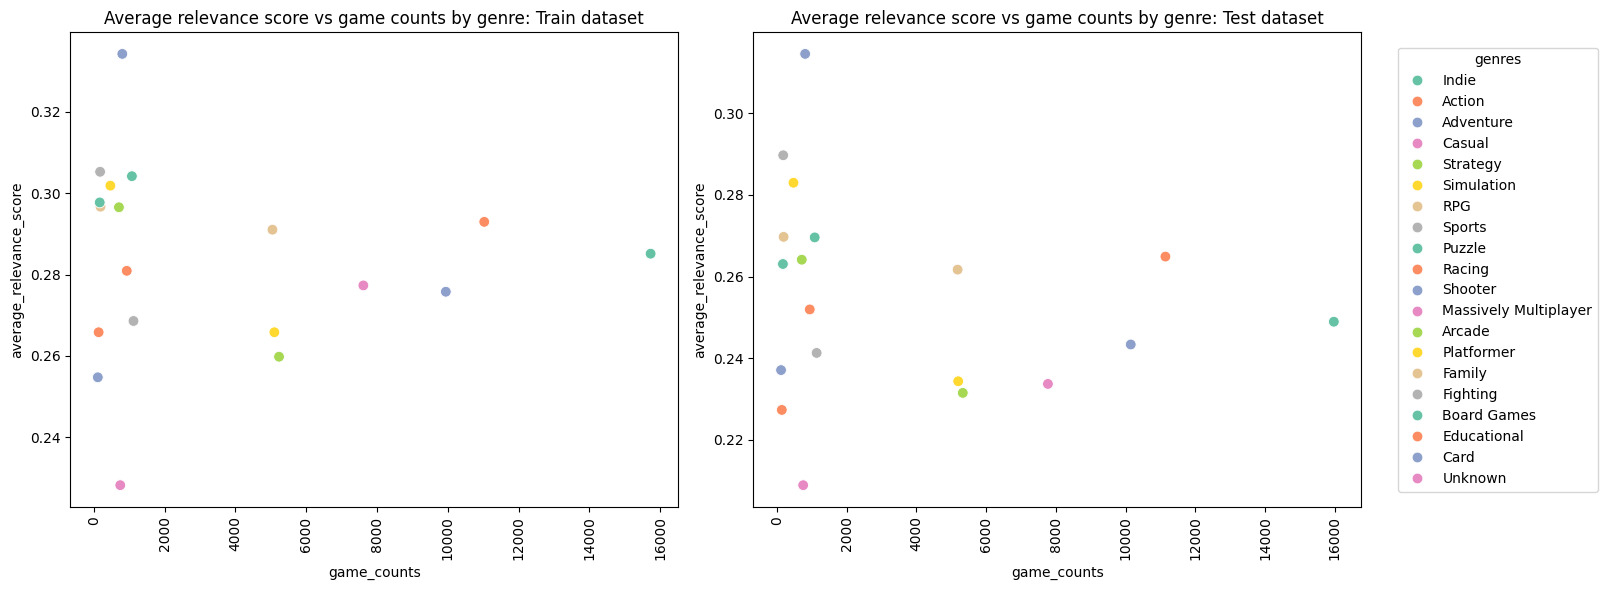

In [15]:
train_score, test_score = count_relevance_score_visualization(train, test)

It is found that relevance score are not always proportional to the game counts!

The top three genres with the highest relevance scores are "Shooter", "Fighting", "Puzzle". This result suggest that games in these genres may have the highest player "stickness".

# 2. Check embeddings

Since our embedding size is 2, we do not need decomposition, clustering.

## 2.1. Direct plot

In [16]:
# This time we load the data with embeddings

train_ready = joblib.load("../assets/combined/train_ready.pkl")
test_ready = joblib.load("../assets/combined/test_ready.pkl")
train_ready.head()

,user_id,app_id,relevance_score,user_country_code,user_has_coordinates,user_latitude,user_longitude,user_account_age_months,game_name,game_tba,game_RAWG_weighted_avg_rating,game_RAWG_ratings_count,game_RAWG_reviews_with_text_count,game_RAWG_bookmark_count,game_metacritic_rating,game_RAWG_system_suggest_count,game_RAWG_reviews_count,game_tags,game_released_month,game_released_day,game_RAWG_rating_5_percent,game_RAWG_rating_4_percent,game_RAWG_rating_3_percent,game_RAWG_rating_1_percent,game_RAWG_bookmark_type_yet_count,game_RAWG_bookmark_type_owned_count,game_RAWG_bookmark_type_beaten_count,game_RAWG_bookmark_type_toplay_count,game_RAWG_bookmark_type_dropped_count,game_RAWG_bookmark_type_playing_count,game_available_platform,game_developer,game_publisher,game_positive_review_count,game_negative_review_count,game_avg_playtime_forever,game_median_playtime_forever,game_current_price,game_initial_price,game_current_discount,game_concurrent_user,game_estimate_owners_lower,game_estimate_owners_upper,game_esrb_rating_Rating Pending,game_esrb_rating_Missing,game_esrb_rating_Mature,game_esrb_rating_Everyone 10+,game_esrb_rating_Teen,game_esrb_rating_Everyone,game_esrb_rating_Adults Only,game_genres_Action,game_genres_Adventure,game_genres_Arcade,game_genres_Board Games,game_genres_Card,game_genres_Casual,game_genres_Educational,game_genres_Family,game_genres_Fighting,game_genres_Indie,game_genres_Massively Multiplayer,game_genres_Platformer,game_genres_Puzzle,game_genres_RPG,game_genres_Racing,game_genres_Shooter,game_genres_Simulation,game_genres_Sports,game_genres_Strategy,game_platforms_3DO,game_platforms_Android,game_platforms_Apple Macintosh,game_platforms_Atari,game_platforms_Commodore / Amiga,game_platforms_Linux,game_platforms_Neo Geo,game_platforms_Nintendo,game_platforms_PC,game_platforms_PlayStation,game_platforms_SEGA,game_platforms_Web,game_platforms_Xbox,game_platforms_iOS,game_popularity,user_preference_game_popularity,user_preference_game_duration,user_preference_new_game,user_preference_avg_spent,user_preference_game_esrb_rating_Rating Pending,user_preference_game_esrb_rating_Missing,user_preference_game_esrb_rating_Mature,user_preference_game_esrb_rating_Everyone 10+,user_preference_game_esrb_rating_Teen,user_preference_game_esrb_rating_Everyone,user_preference_game_esrb_rating_Adults Only,user_preference_game_genres_Action,user_preference_game_genres_Adventure,user_preference_game_genres_Arcade,user_preference_game_genres_Board Games,user_preference_game_genres_Card,user_preference_game_genres_Casual,user_preference_game_genres_Educational,user_preference_game_genres_Family,user_preference_game_genres_Fighting,user_preference_game_genres_Indie,user_preference_game_genres_Massively Multiplayer,user_preference_game_genres_Platformer,user_preference_game_genres_Puzzle,user_preference_game_genres_RPG,user_preference_game_genres_Racing,user_preference_game_genres_Shooter,user_preference_game_genres_Simulation,user_preference_game_genres_Sports,user_preference_game_genres_Strategy,user_preference_game_platforms_3DO,user_preference_game_platforms_Android,user_preference_game_platforms_Apple Macintosh,user_preference_game_platforms_Atari,user_preference_game_platforms_Commodore / Amiga,user_preference_game_platforms_Linux,user_preference_game_platforms_Neo Geo,user_preference_game_platforms_Nintendo,user_preference_game_platforms_PlayStation,user_preference_game_platforms_SEGA,user_preference_game_platforms_Web,user_preference_game_platforms_Xbox,user_preference_game_platforms_iOS,game_released_year_since_1984.0,user_emb,game_emb
0,76561198073669602,4000,0.641805,Missing,False,0.013426,0.127397,-0.931663,Garry's Mod,False,0.860995,1.608732,1.749052,1.741923,-0.016078,0.548359,1.608675,"[Singleplayer, Steam Achievements, Multiplayer...",1.560527,0.926604,0.944343,0.804017,-0.196678,-0.379912,1.065152,1.822439,1.405361,0.953262,1.978556,1.954364,"[Linux, macOS, PC]",[facepunch studios],[valve],2.305740,1.956727,2.197327,1.49662

In [17]:
def embedding_genre_generation(df,df_ready):

    ''' This function will take two DataFrame as input:
    df: the train/test datasets after imputation. It does not have embedding information.
    df_ready: the train/test datasets for modeling. It does not have "game_genres" column.
    '''
    
    # Drop replicates will avoid genreating NA value for merging.
    
    df_ready = df_ready.drop_duplicates(subset = ["user_id", "app_id","relevance_score"])
    df = df.drop_duplicates(subset = ["user_id", "app_id","relevance_score"])
    embedding_df = pd.merge(df, df_ready[["user_id", "app_id","relevance_score", "game_emb","user_emb"]], on = ["user_id", "app_id"])

    game_emb_array = np.array(embedding_df["game_emb"].tolist())
    user_emb_array = np.array(embedding_df["user_emb"].tolist())

    # We've know the embedding size is 2. So we can split it into x and y
    embedding_df[["game_emb_x", "game_emb_y"]] = game_emb_array
    embedding_df[["user_emb_x", "user_emb_y"]] = user_emb_array

    # Since some games may have more than one genre, we take the 1st genre as the main genre.
    genre_df = embedding_df["game_genres"].apply(pd.Series)
    embedding_df["main_genre"] = genre_df.iloc[:,0]
    
    return embedding_df[["user_id","app_id","main_genre","game_emb_x", "game_emb_y","user_emb_x", "user_emb_y"]]
    

In [18]:
train_embedding_genre_df =  embedding_genre_generation(train,train_ready)
test_embedding_genre_df =  embedding_genre_generation(test,test_ready)
test_embedding_genre_df.head()

,user_id,app_id,main_genre,game_emb_x,game_emb_y,user_emb_x,user_emb_y
0,76561197960304100,10,Action,0.488359,-0.424781,0.705424,0.230451
1,76561197960304100,20,Action,0.324151,-0.268209,0.705424,0.230451
2,76561197960304100,30,Action,0.201895,-0.154289,0.705424,0.230451
3,76561197960304100,40,Action,0.187860,-0.146339,0.705424,0.230451
4,76561197960304100,50,Action,0.396254,-0.339584,0.705424,0.230451


In [19]:
def plot_emb(train_embedding_genre_df, test_embedding_genre_df, embedding_type = None):

    '''This function will take the train/test embedding-genre DataFrames, and generate 
    scatter plots using game embeddings and use embeddings to visualize the genre distributions, respectively.
    
    Embeddning type: game or user
    '''

    
    fig, ax = plt.subplots(1,2, figsize = (16,6))

    sns.scatterplot(data = train_embedding_genre_df, x= f"{embedding_type}_emb_x", y = f"{embedding_type}_emb_y", 
                    ax= ax[0], hue = "main_genre", palette = "Set2", s = 60, legend = False)
    ax[0].set_title(f"Genre distribution across the embeddings of {embedding_type}: Train dataset")

    sns.scatterplot(data = test_embedding_genre_df, x= f"{embedding_type}_emb_x", y = f"{embedding_type}_emb_y", 
                ax= ax[1], hue = "main_genre", palette = "Set2", s = 60)
    ax[1].set_title(f"Genre distribution across the embeddings of {embedding_type}: Test dataset")

    plt.xticks(rotation = 45)

    sns.move_legend(ax[1], "center right", bbox_to_anchor=(1.4, 0.5))
    plt.tight_layout()
    

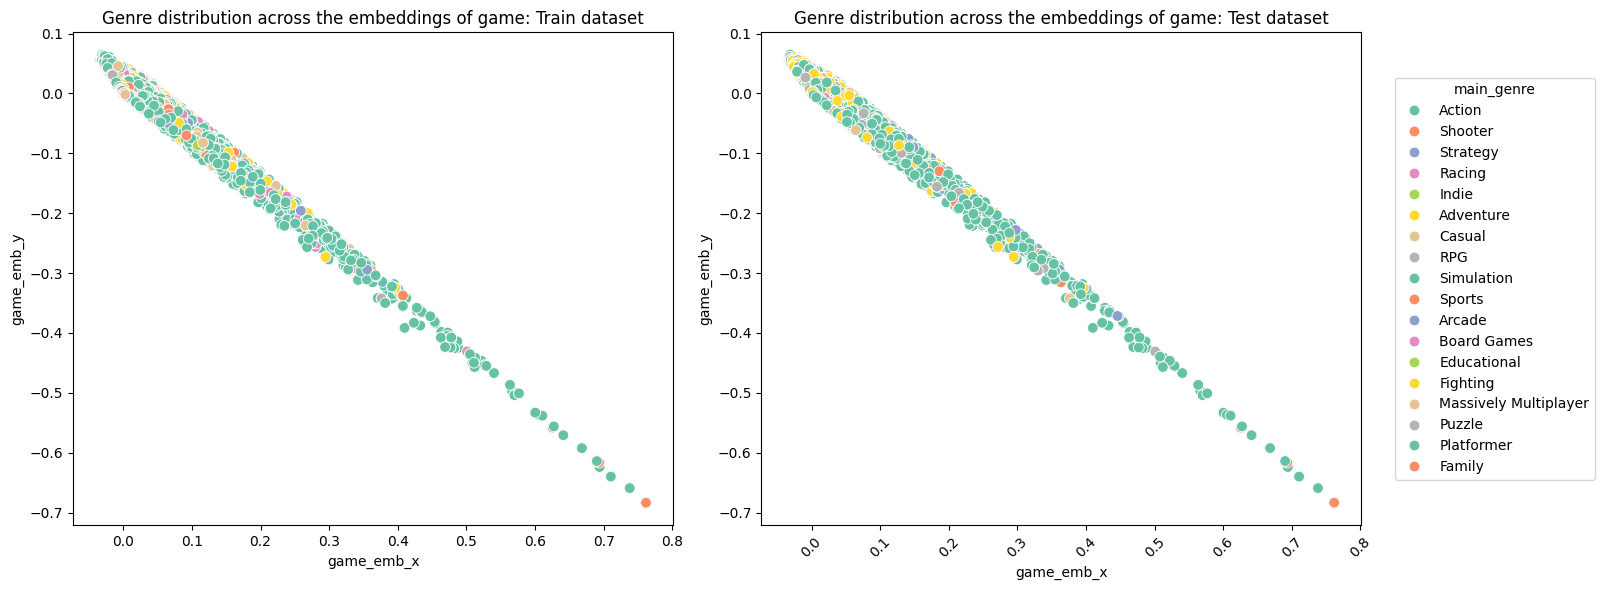

In [20]:
# Plot the genres across game embeddings
plot_emb(train_embedding_genre_df, test_embedding_genre_df, embedding_type = "game")

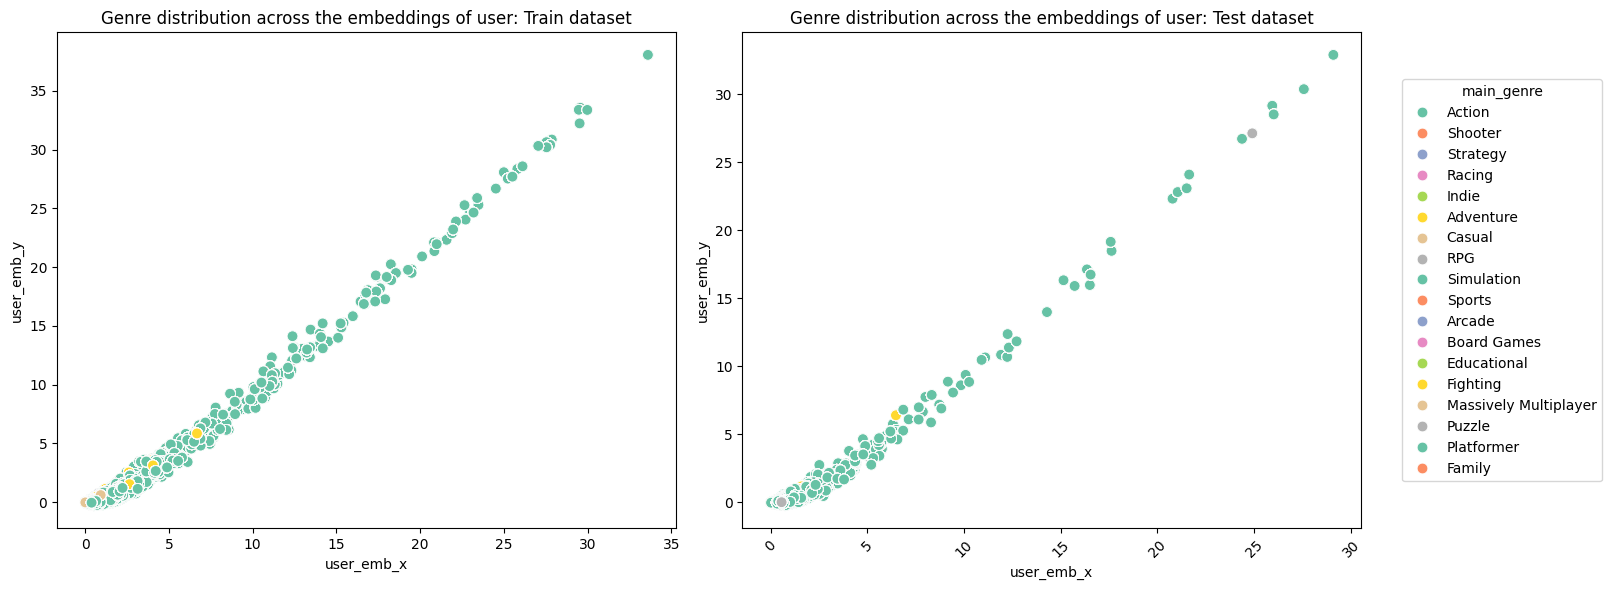

In [21]:
plot_emb(train_embedding_genre_df, test_embedding_genre_df, embedding_type = "user")

Neither user embedding nor game embedding provides sufficient clustering information. Let's see what if we combined them togher and do decomposition.
Since the train/test distribution are merely the same, we will only plot train dataset in the following plots.

## 2.2. Plot by PCA

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(train_embedding_genre_df[["game_emb_x",	"game_emb_y",	"user_emb_x",	"user_emb_y"]])
df_pca = pd.DataFrame(x_pca)
df_pca["genre"] = train_embedding_genre_df["main_genre"]

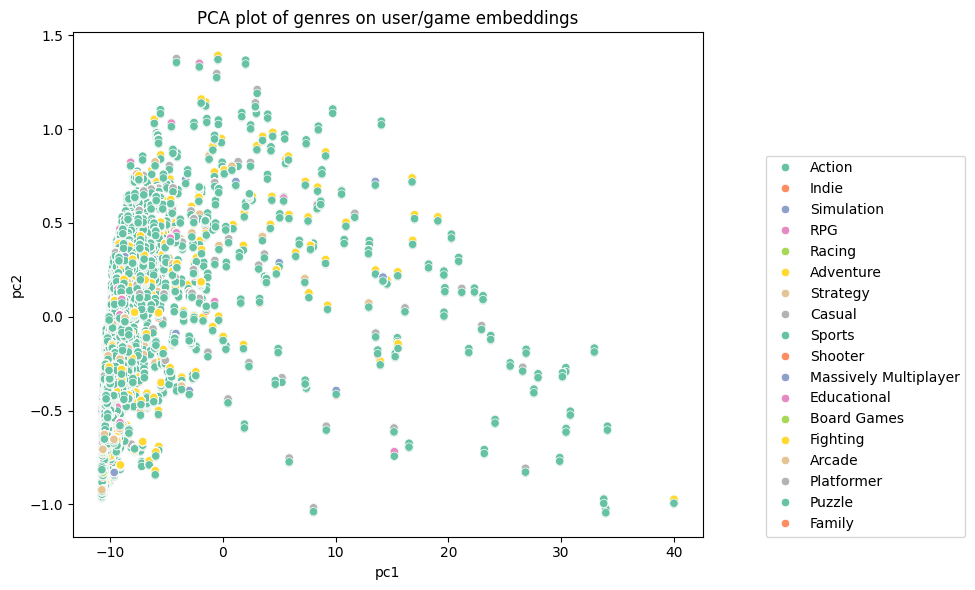

In [38]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df_pca, x=0, y= 1, hue ="genre",palette="Set2")
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.title("PCA plot of genres on user/game embeddings")
plt.legend(loc = (1.1,0))
plt.tight_layout();

## 2.3. Plot by t-SNE

In [24]:
# t-SNE takes a long time to calcultion. So we just take 10000 samples 

from sklearn.manifold import TSNE
sample_train_embedding_genre_df = train_embedding_genre_df.sample(n = 10000, random_state =42)

tsne = TSNE(n_components=2, perplexity=20, n_iter=500)
x_tsne = tsne.fit_transform(sample_train_embedding_genre_df[["game_emb_x",	"game_emb_y",	"user_emb_x",	"user_emb_y"]])
df_tsne = pd.DataFrame(x_tsne)
df_tsne["genre"] = sample_train_embedding_genre_df["main_genre"].tolist()

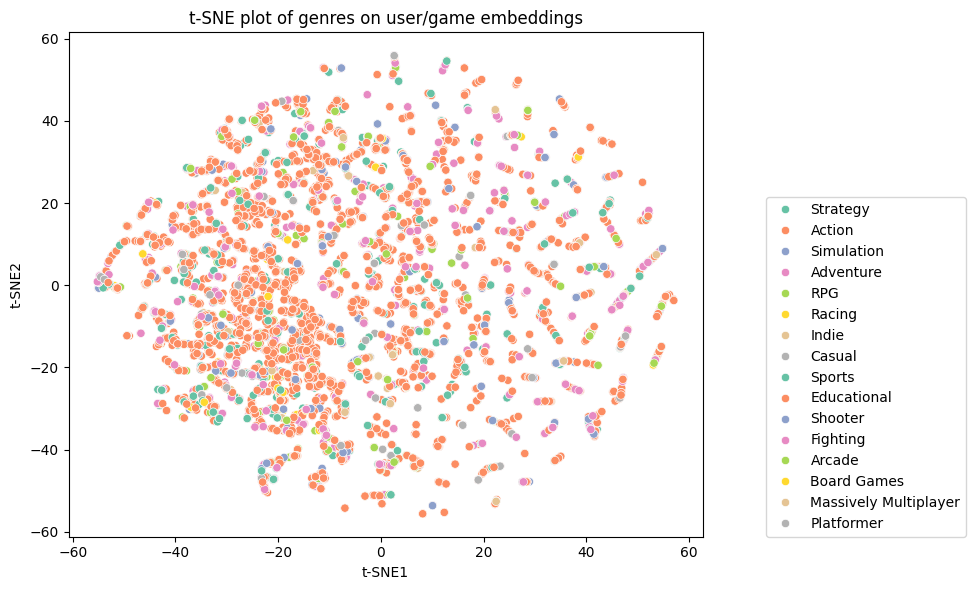

In [39]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df_tsne, x=0, y= 1, hue ="genre", palette = "Set2")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.title("t-SNE plot of genres on user/game embeddings")
plt.legend(loc = (1.1,0))
plt.tight_layout();

## 2.4. Plot by UMAP

In [35]:
# UMAP is slower than PCA but faster than t-SNE. Let's take 100000 samples.

import umap.umap_ as umap
sample_train_embedding_genre_df = train_embedding_genre_df.sample(n = 10000, random_state =42)

reducer  = umap.UMAP(n_neighbors = 10, n_components = 2, random_state =42)
x_umap = reducer.fit_transform(sample_train_embedding_genre_df[["game_emb_x",	"game_emb_y",	"user_emb_x",	"user_emb_y"]])
df_umap = pd.DataFrame(x_umap)
df_umap["genre"] = sample_train_embedding_genre_df["main_genre"].tolist()

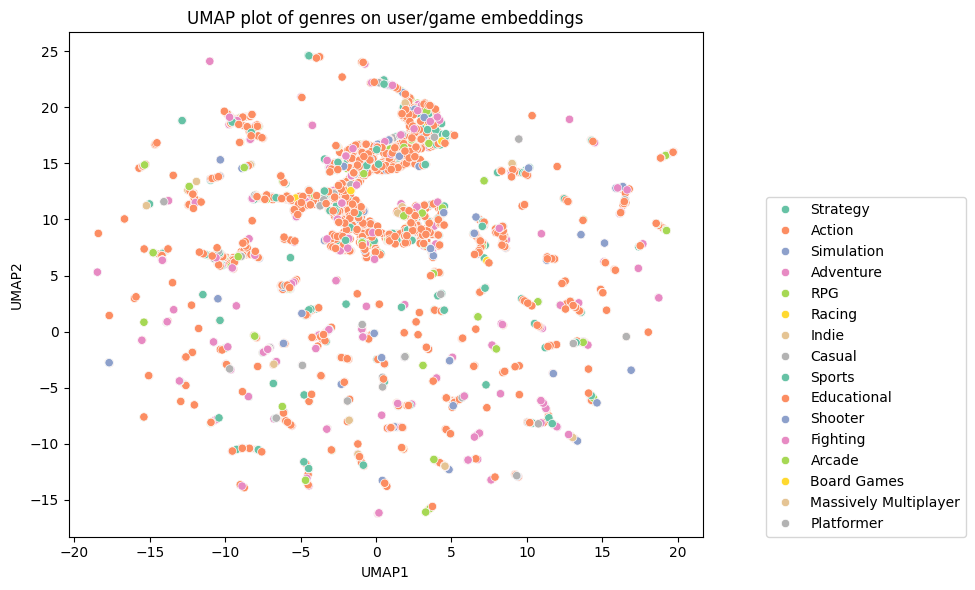

In [37]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df_umap, x=0, y= 1, hue ="genre",palette="Set2")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.title("UMAP plot of genres on user/game embeddings")
plt.legend(loc = (1.1,0))
plt.tight_layout();

In [34]:
df_umap

,0,1,genre
0,-2.352324,7.220106,NaN
1,-8.209058,9.881471,NaN
2,-0.188257,-0.222168,NaN
3,-1.057658,15.885748,NaN
4,3.667945,7.368873,NaN
...,...,...,...
9995,-0.803296,15.614554,NaN
9996,-2.652642,4.535752,NaN
9997,-1.563081,11.369184,NaN
9998,7.886178,-12.974766,NaN


## 2.5. Plot by DBSCAN

In [49]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

dbscan = DBSCAN(eps=0.5, min_samples=10)

sample_train_embedding_genre_df = train_embedding_genre_df.sample(n=10000, random_state=42)

# DBSCAN is sensitive to the distance. We will do scaling.
X = sample_train_embedding_genre_df[["game_emb_x",	"game_emb_y",	"user_emb_x",	"user_emb_y"]]
X_scaled = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.5, min_samples=112, n_jobs=-1) # we use 112 as the count of "Card" genre is 112, which is the lowest
labels = db.fit_predict(X)
sample_train_embedding_genre_df["cluster"] = labels

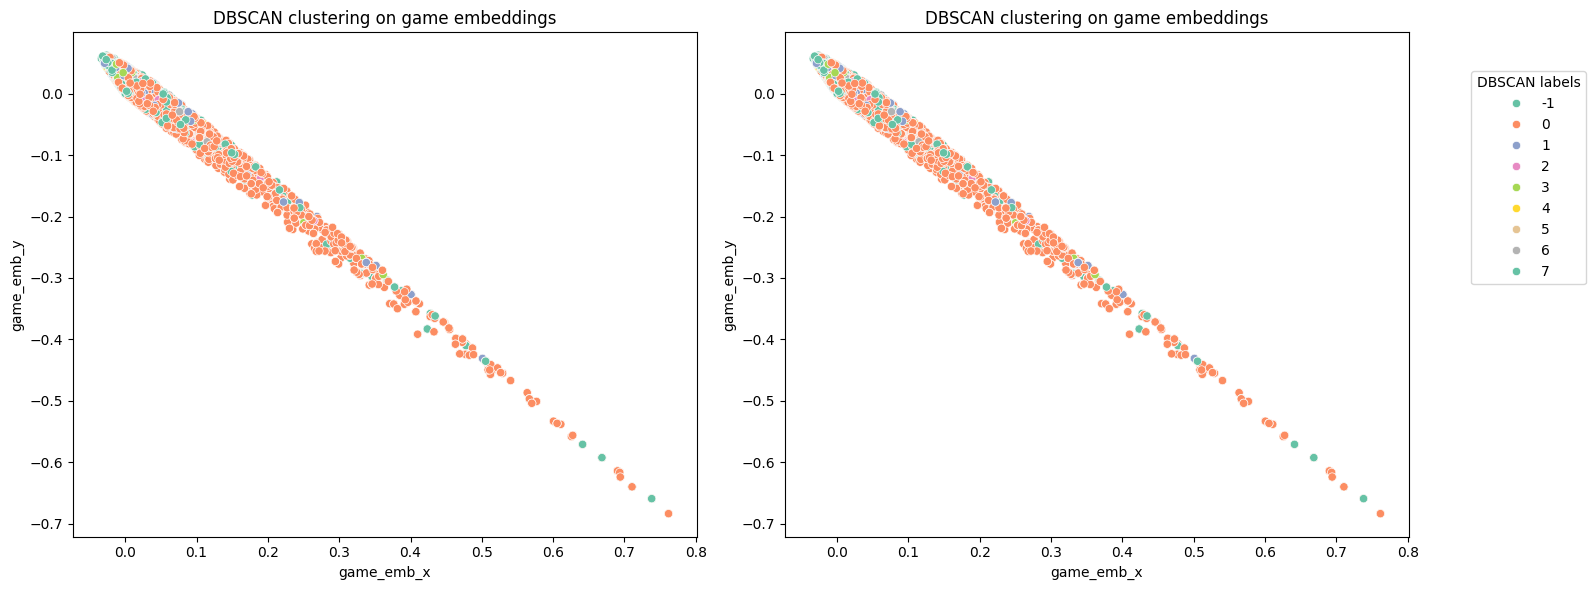

In [58]:
fig, ax = plt.subplots(1,2, figsize = (16,6))
sns.scatterplot(data=sample_train_embedding_genre_df, x="game_emb_x",y="game_emb_y",hue="cluster",  
                ax = ax[0], palette="Set2",legend=False)
ax[0].set_title("DBSCAN clustering on game embeddings")

sns.scatterplot(data=sample_train_embedding_genre_df, x="game_emb_x",y="game_emb_y",hue="cluster",  
                ax = ax[1], palette="Set2",legend = "full")
ax[1].set_title("DBSCAN clustering on game embeddings")

plt.legend(loc = (1.1,0.5), title = "DBSCAN labels")

plt.tight_layout()
plt.show()
